# Results of Edge Detection Benchmark and Speedup

By: Tanmay Grandhisiri

## Serial Experiment

I compiled the serial code on `AMD EPYC 7H12 64-Core Processor @ 2.6GHz` using the following commands:

```
make clean
make
```

The `makefile` has the commands needed to compile the code. 

In ran the code 10 times on the dev-amd20 node and obtained the following results. I had a run.sh script that would calculate the average time taken to run the code for each of the images: Cube, Earth, Sparty, and MSUStadium. The `run.sh` script has the code needed to calculate the average time. 

## Code Optimization

For optimizing my code, I had two ideas: Use compiler optimizations and change the order of loops to improve cache hits.

* Compiler Optimizations: -O1, -O2, -O3, -Os flags to make the code faster.
* Loop Order: I changed the order of loops to improve cache hits. I switched the order of the loops to go over the rows first and then the columns, for the Average, Gradient and Edge detection filters.



| Image | Regular | O1 | O2 | O3 | Os |
|-------|---------|----|----|----|----|
| Cube  | .2068   | .0696 | .0697 | .0670 | .0729 |
| Earth | 6.8294  | 2.434 | 2.440 | 2.251 | 2.510 |
| Sparty| .2098   | .0827 | .0812 | .0801 | .0871 |
| Stadium| .2667  | .120 | .119 | .116 | .125 |

Table 1: Timing measurements in seconds for the different images and compiler optimizations.

Based on the compiler optimizations in Table 1, there is a significant speedup from original code to the optimized compiler code.  The best compiler optimization was O3.  The following table shows the differences in speed for the different images.


| Image | Average Filter | Gradient Filter | Edge Thresholding |
|-------|----------------|-----------------|-------------------|
| Cube  | .0649          | .0645           | .0649             |
| Earth | 1.9854         | 1.8920          | 1.7285            |
| Sparty| .0754          | .0743           | .0743             |
| Stadium| .1108         | .1103           | .1124             |

Table 2: Timing measurements in seconds for the different images and loops.

This speedup in changing the order of the loops is noticeable due to multiple cache hits. Since we are iterating over the rows first and then the columns, we are accssing the memory in a more sequential manner. The cache already prefetches the subsequent rows, which makes the access faster.

The best serial code can be found in the `best_serial_main.c` file.

The following graphs illustrate the Time taken for the different images and compiler optimizations.

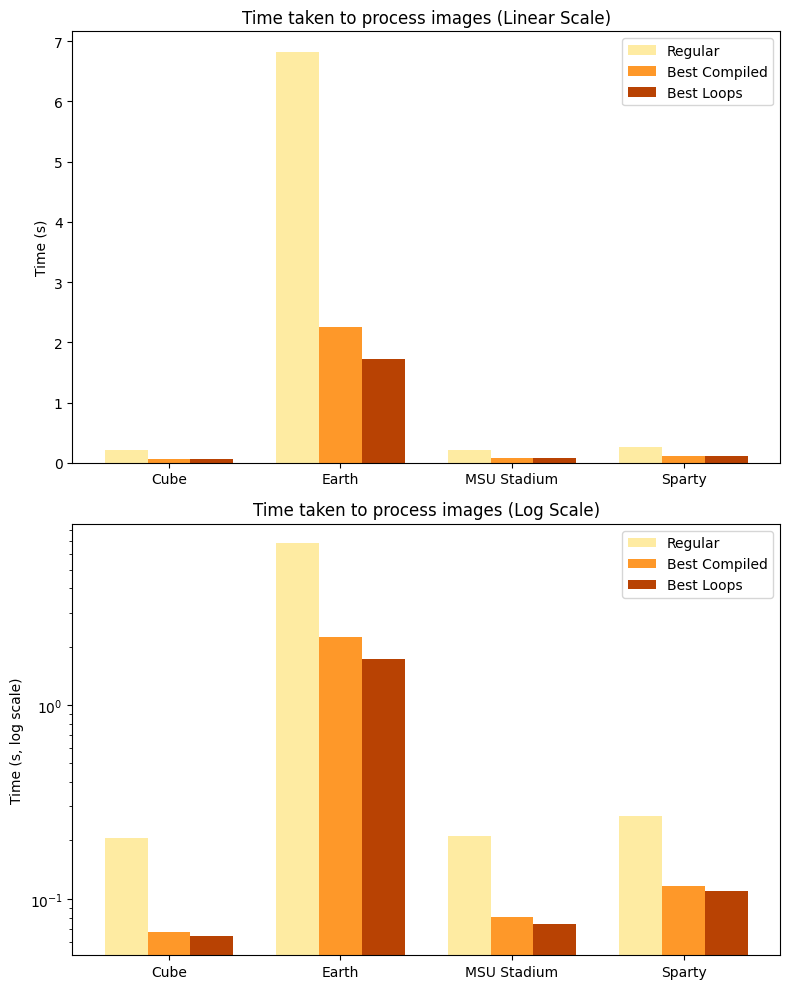


## OpenMP Speedup

For my OpenMP speedup, I intended to build upon the best serial code and parallelize it. The two ideas for this were to use #pragma omp parallel for collapse(2) directive and to use scheduling to distribute the work evenly among the threads.

* `#pragma omp parallel for collapse(2)`: This directive parallelizes the outer two loops, which are the loops that iterate over the rows and columns of the image. This optimizes the code by allowing multiple threads to work on different parts of the image simultaneously.
* Scheduling: I used static, dynamic,guided, runtime, and auto scheduling to distribute the work evenly among the threads.

| Image | No Scheduling | Static | Dynamic | Guided | Runtime | Auto |
|-------|---------------|---------|---------|--------|---------|------|
| Cube  | .1229         | .0654   | .3045   | .0655  | .2958   | .2958|
| Earth | .8464         | .5434   | 7.1993  | .5384  | 7.7617  | 7.7617|
| Sparty| .1278         | .0788   | .2977   | .0739  | .2953   | .2953|
| Stadium| .1584        | .1083   | .3653   | .1044  | .3663   | .3663|

Table 3: Timing measurements in seconds for the different images and scheduling options.

From the table above, we can see that the best scheduling option is static. The static scheduling option is the fastest for all images, while dynamic scheduling is the slowest due to the overhead involved in distributing work among threads. The guided scheduling option, although slightly better than dynamic in some cases, does not consistently outperform static scheduling. This suggests that our workload—processing uniformly sized image data—benefits most from an even division of iterations across threads. Therefore, static scheduling is the most efficient choice for these image processing tasks.

## Concluding Discussion

I learnt that there's extremely good optimizations that are already available in the compiler. Many people have spent a lot of time optimizing the compiler and it is worth using these optimizations. I also learnt that contiguous memory access is the key to improving cache hits. With regards to OpenMP, all I had to do was add a few commands and directives and the OpenMP library took care of the rest. I did not have to worry about thread management or synchronization. I could have explored more with OpenMP, but I am happy with the results I got and the benchmarks I ran. I had trouble with the OpenMP code at first, but I was able to fix it by using the correct directives and taking help from online resources. I also found it extremely tedius to write code on the HPCC server and I had to constantly git pull and push my code from my local machine to the server. Overall it was a great learning experience. 

## Images produced from the code

| Name | Image                                                       |
|------|-------------------------------------------------------------|
| Cube | <img src="./test.png" alt="cube" width="200"/> |


----